Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


863/863 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 8.2768 - val_loss: 0.0336 - learning_rate: 0.0010
Epoch 2/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.2615 - val_loss: 0.0264 - learning_rate: 0.0010
Epoch 3/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.0463 - val_loss: 0.2042 - learning_rate: 0.0010
Epoch 4/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1.0290 - val_loss: 0.0166 - learning_rate: 0.0010
Epoch 5/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.0091 - val_loss: 0.0224 - learning_rate: 0.0010
Epoch 6/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.8901 - val_loss: 0.0359 - learning_rate: 0.0010
Epoch 7/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.8599 - val_loss: 0.0196 - learning_rate: 0.0010
Epoch 8/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.8844 - val_loss: 0.0365 - learning_rate: 0.0010
Epoch 9/100
860/863 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8309
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0


✅ Model saved to: /content/drive/MyDrive/saved_models/solarPredictionModel.h5
✅ Scaler saved to: /content/drive/MyDrive/saved_models/solar_scaler.pkl
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE: 0.12
MAE : 0.10
R²  : 0.9993


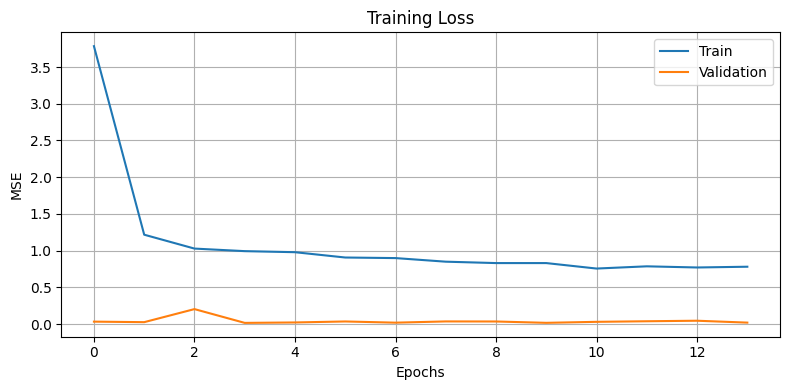

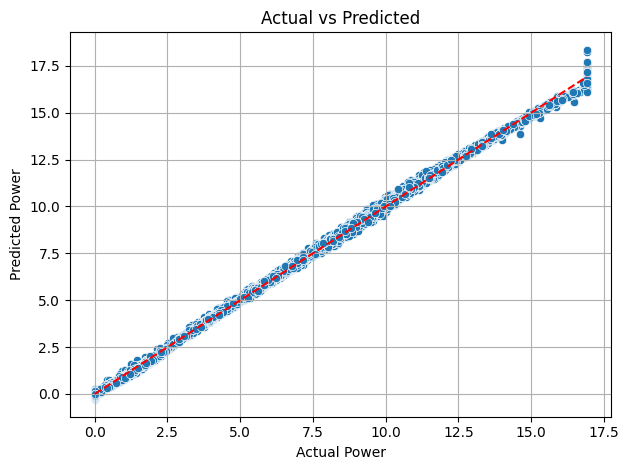

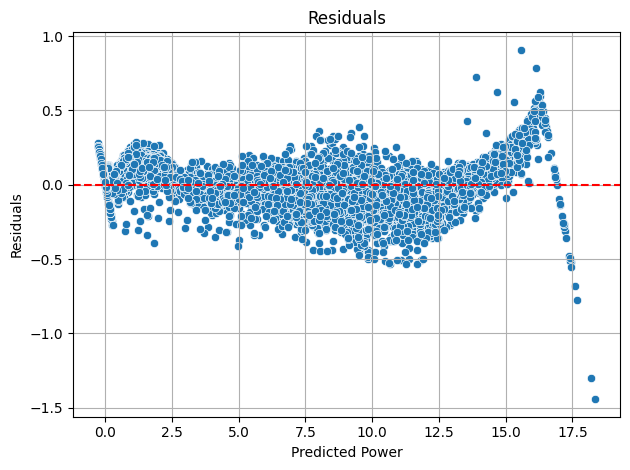

370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
370/370 ━━━━━━━━

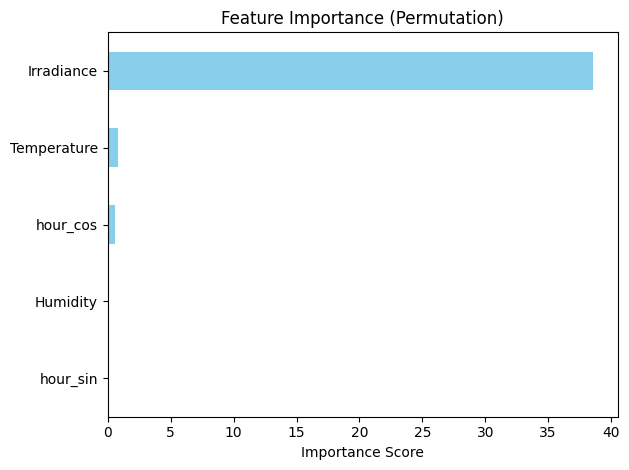


--- Manual Prediction ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
⚡ Predicted Power: 14.87 WATTS


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# --- Imports ---
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.base import BaseEstimator, RegressorMixin
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import joblib

# --- 1. Data Handling ---
def load_and_preprocess_data(filepath):
    df = pd.read_csv(filepath)
    df.rename(columns={'T2M': 'Temperature', 'RH2M': 'Humidity', 'WATTS': 'POWER'}, inplace=True)
    df.drop(columns=[col for col in ["Unnamed: 7", "YEAR", "MO", "DY"] if col in df.columns], inplace=True)
    df.dropna(inplace=True)

    # Cap outliers
    for col in ['Irradiance', 'Temperature', 'Humidity', 'POWER']:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        df[col] = np.clip(df[col], Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

    # Cyclical encoding for hour
    df['hour_sin'] = np.sin(2 * np.pi * df['HR'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['HR'] / 24)
    df.drop(columns=['HR'], inplace=True)

    features = ['Irradiance', 'Temperature', 'Humidity', 'hour_sin', 'hour_cos']
    target = 'POWER'
    X, y = df[features], df[target]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler, features

# --- 2. Model Architecture ---
def build_ann_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# --- 3. Training ---
def train_model(model, X_train, y_train, X_val, y_val):
    callbacks = [
        EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss'),
        ReduceLROnPlateau(patience=5, factor=0.5, verbose=1, monitor='val_loss')
    ]
    return model.fit(X_train, y_train, validation_data=(X_val, y_val),
                     epochs=100, batch_size=64, callbacks=callbacks, verbose=1)

# --- 4. Evaluation ---
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test).flatten()
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"MAE : {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R²  : {r2_score(y_test, y_pred):.4f}")
    return y_pred

# --- 5. Visualizations ---
def plot_history(history):
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_predictions(y_true, y_pred):
    sns.scatterplot(x=y_true, y=y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual Power')
    plt.ylabel('Predicted Power')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residuals')
    plt.xlabel('Predicted Power')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- 6. Feature Importance ---
class KerasWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y): return self
    def predict(self, X): return self.model.predict(X).flatten()

def plot_feature_importance(model, X_test, y_test, feature_names):
    result = permutation_importance(KerasWrapper(model), X_test, y_test, n_repeats=10, scoring='neg_mean_squared_error')
    importance = pd.Series(result.importances_mean, index=feature_names)
    importance.sort_values().plot(kind='barh', color='skyblue')
    plt.title('Feature Importance (Permutation)')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

# --- 7. Single Prediction ---
def predict_power(model, scaler, features, manual_input):
    hr = manual_input.pop('HR')
    manual_input['hour_sin'] = np.sin(2 * np.pi * hr / 24)
    manual_input['hour_cos'] = np.cos(2 * np.pi * hr / 24)
    input_vector = [manual_input[f] for f in features]
    input_scaled = scaler.transform([input_vector])
    prediction = max(0, model.predict(input_scaled).flatten()[0])
    print(f"⚡ Predicted Power: {prediction:.2f} WATTS")

# --- 8. Main Pipeline ---
if __name__ == "__main__":
    filepath = "/content/drive/MyDrive/sim_data.csv"
    model_path = "/content/drive/MyDrive/saved_models/solarPredictionModel.h5"

    # Load Data
    X_scaled, y, scaler, features = load_and_preprocess_data(filepath)

    # Split
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Build & Train
    model = build_ann_model(X_train.shape[1])
    history = train_model(model, X_train, y_train, X_val, y_val)

    # Save model
    os.makedirs(os.path.dirname(model_path), exist_ok=True)
    model.save(model_path)
    print(f"\n✅ Model saved to: {model_path}")

    # Save the scaler
    scaler_path = "/content/drive/MyDrive/saved_models/solar_scaler.pkl"
    joblib.dump(scaler, scaler_path)
    print(f"✅ Scaler saved to: {scaler_path}")




    # Evaluate & Visualize
    y_pred = evaluate_model(model, X_test, y_test)
    plot_history(history)
    plot_predictions(y_test, y_pred)
    plot_residuals(y_test, y_pred)
    plot_feature_importance(model, X_test, y_test, features)

    # Example prediction
    print("\n--- Manual Prediction ---")
    predict_power(model, scaler, features, {
        'Irradiance': 750.0,
        'Temperature': 28.5,
        'Humidity': 60.0,
        'HR': 0
    })


In [ ]:
import numpy as np
import pandas as pd
import json
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
import joblib
import os

# --- CONFIGURATION ---
model_path = "/content/drive/MyDrive/saved_models/solarPredictionModel.h5"
scaler_path = "/content/drive/MyDrive/saved_models/solar_scaler.pkl"

# --- LOAD MODEL ---
if os.path.exists(model_path):
    try:
        model = load_model(model_path, custom_objects={'mse': MeanSquaredError()})
        print("✅ Model loaded successfully.")
    except Exception as e:
        print(f"❌ Failed to load model: {e}")
        exit()
else:
    print(f"❌ Error: Model file not found at {model_path}")
    exit()

# --- LOAD SCALER ---
if os.path.exists(scaler_path):
    try:
        scaler = joblib.load(scaler_path)
        print("✅ Scaler loaded successfully.")
    except Exception as e:
        print(f"❌ Failed to load scaler: {e}")
        scaler = None
else:
    print(f"⚠️ Scaler file not found at {scaler_path}. Predictions may be inaccurate.")
    scaler = None

# --- PREDICTION FUNCTION ---
def predict_solar_power(model, scaler, irradiance, temperature, humidity, hr):
    hour_sin = np.sin(2 * np.pi * hr / 24)
    hour_cos = np.cos(2 * np.pi * hr / 24)

    input_df = pd.DataFrame([{
        "Irradiance": irradiance,
        "Temperature": temperature,
        "Humidity": humidity,
        "hour_sin": hour_sin,
        "hour_cos": hour_cos
    }])

    if scaler is not None:
        try:
            input_scaled = scaler.transform(input_df)
        except Exception as e:
            return json.dumps({"error": f"Scaler failed: {str(e)}"})
    else:
        input_scaled = input_df.values

    if hr >= 18 or hr < 5:
        predicted_power = 0.0
    else:
        try:
            prediction = model.predict(input_scaled, verbose=0)
            predicted_power = max(0.0, float(prediction[0][0]))
        except Exception as e:
            return json.dumps({"error": f"Prediction failed: {str(e)}"})

    # Build JSON response
    response = {
        "Irradiance": irradiance,
        "Temperature": temperature,
        "Humidity": humidity,
        "HR": hr,
        # "hour_sin": round(hour_sin, 4),
        # "hour_cos": round(hour_cos, 4),
        "PredictedPower": round(predicted_power, 4)
    }

    return json.dumps(response)

# --- EXAMPLE USAGE ---
irr = 0
temp = 30.3
hum = 62.0
hour = 16

result_json = predict_solar_power(model, scaler, irr, temp, hum, hour)
print(result_json)


✅ Model loaded successfully.
✅ Scaler loaded successfully.
{"Irradiance": 0, "Temperature": 30.3, "Humidity": 62.0, "HR": 16, "PredictedPower": 0.5114}


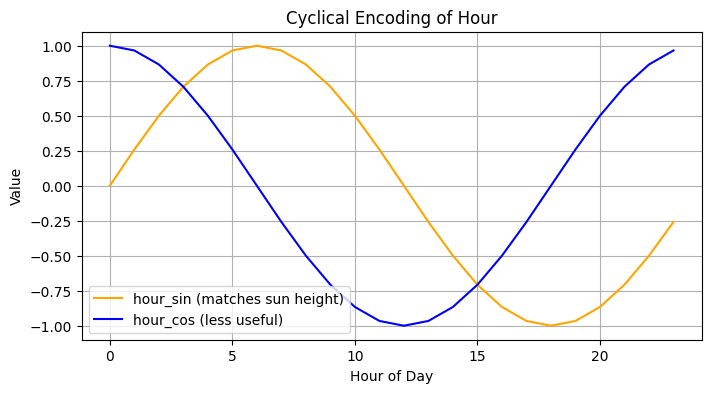

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

hours = np.arange(0, 24)
hour_sin = np.sin(2 * np.pi * hours / 24)
hour_cos = np.cos(2 * np.pi * hours / 24)

plt.figure(figsize=(8, 4))
plt.plot(hours, hour_sin, label='hour_sin (matches sun height)', color='orange')
plt.plot(hours, hour_cos, label='hour_cos (useful)', color='blue')
plt.xlabel("Hour of Day")
plt.ylabel("Value")
plt.title("Cyclical Encoding of Hour")
plt.grid(True)
plt.legend()
plt.show()
